# 🚀 Apache Beam Programming Model

---

## 🖼️ Flow of Beam Programming Model

First, let’s understand the **basic flow of Beam’s programming model**.  

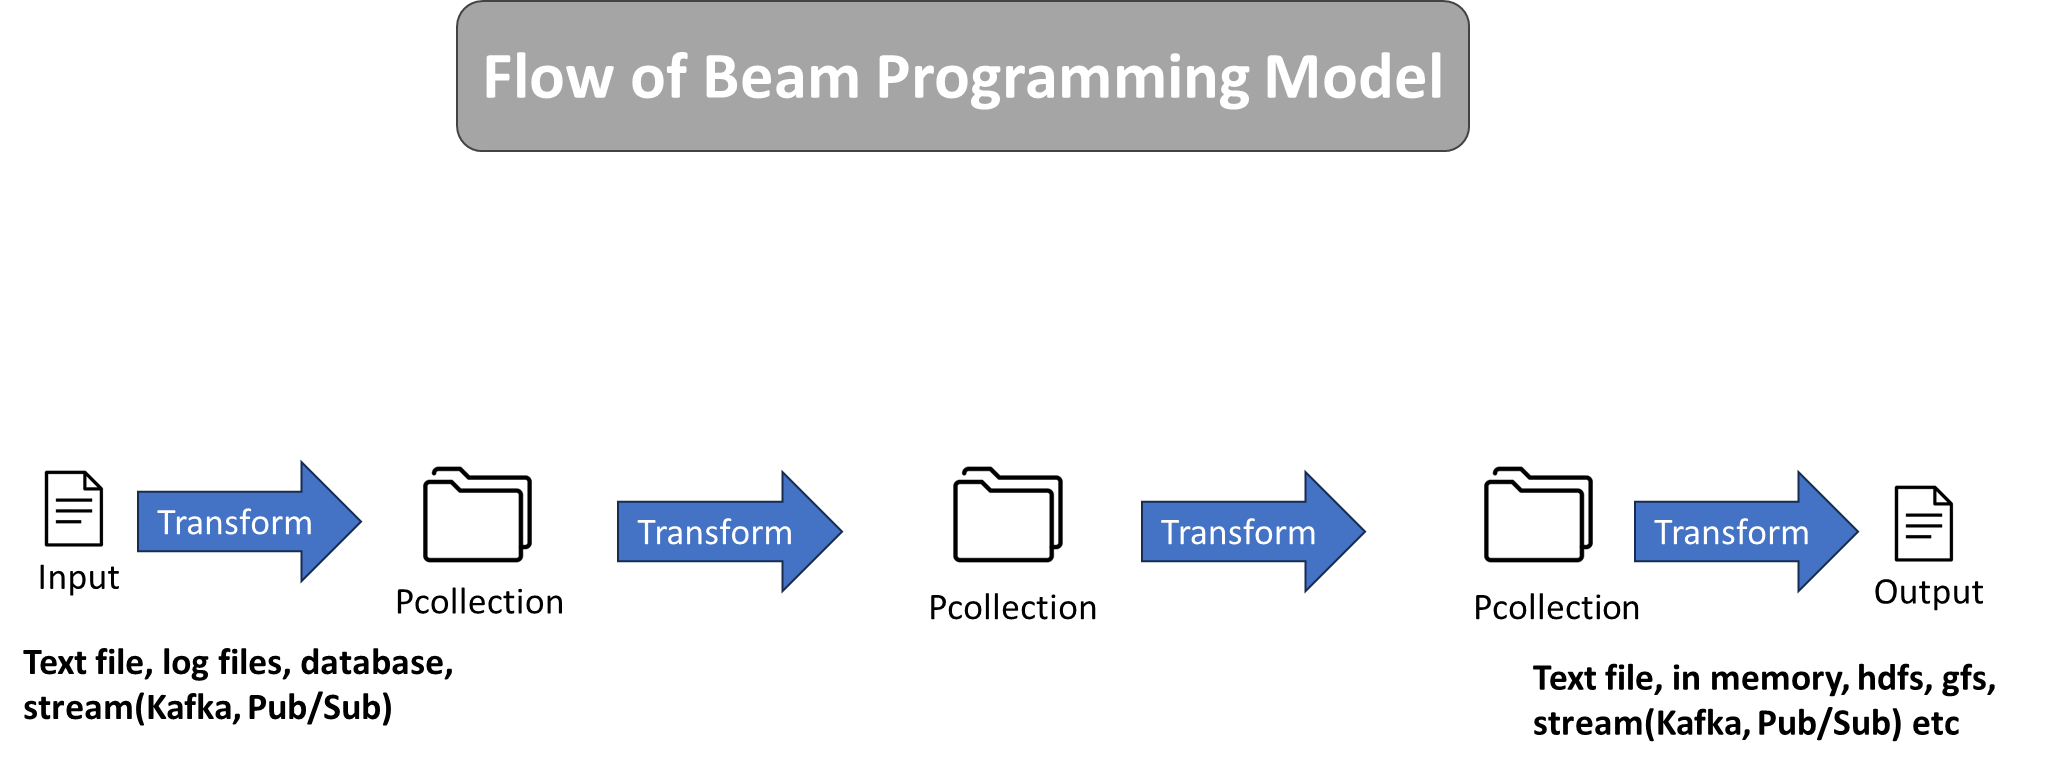
---

## 🔹 Explanation

- A **Beam pipeline** always starts with an **Input (Source)**.  
- The input can be:
  - Plain text files
  - Formatted log files
  - Rows in a database table
  - Streaming data from **Kafka**, **Google Cloud Pub/Sub**, etc.  

- After that, the data passes through a series of **Transforms**:
  - These are operations that process, filter, group, or enrich the data.  
  - This is the **core portion** where we spend most of our time.  

- Finally, we have an **Output (Sink)**:
  - It can be written to **files**, **HDFS**, **Google File System (GFS)**, **BigQuery**, or **in-memory** storage.

---

## 🔹 Key Point to Note

- The Beam programming model looks similar to **Spark** or **Flink**:
  - Input → Transformations → Output  
- But Beam’s uniqueness is that it’s **unified**:
  - Works for **batch** and **streaming**.  
  - Runs on multiple **execution engines** (Spark, Flink, Dataflow, etc.).

---

✅ In this course, we will:
1. Try covering different **input & output** options.  
2. Focus mainly on the **Transformations**, since they are the heart of Beam programming.  

---

👉 Next, we will move on to the **Beam Architecture** to see how all of this works under the hood.


# 🏗️ Example: Counting Employee Attendance with Apache Beam

---

## 🖼️ Flow of Attendance Use Case

Let’s take a real-world example to understand Beam’s programming model more clearly.

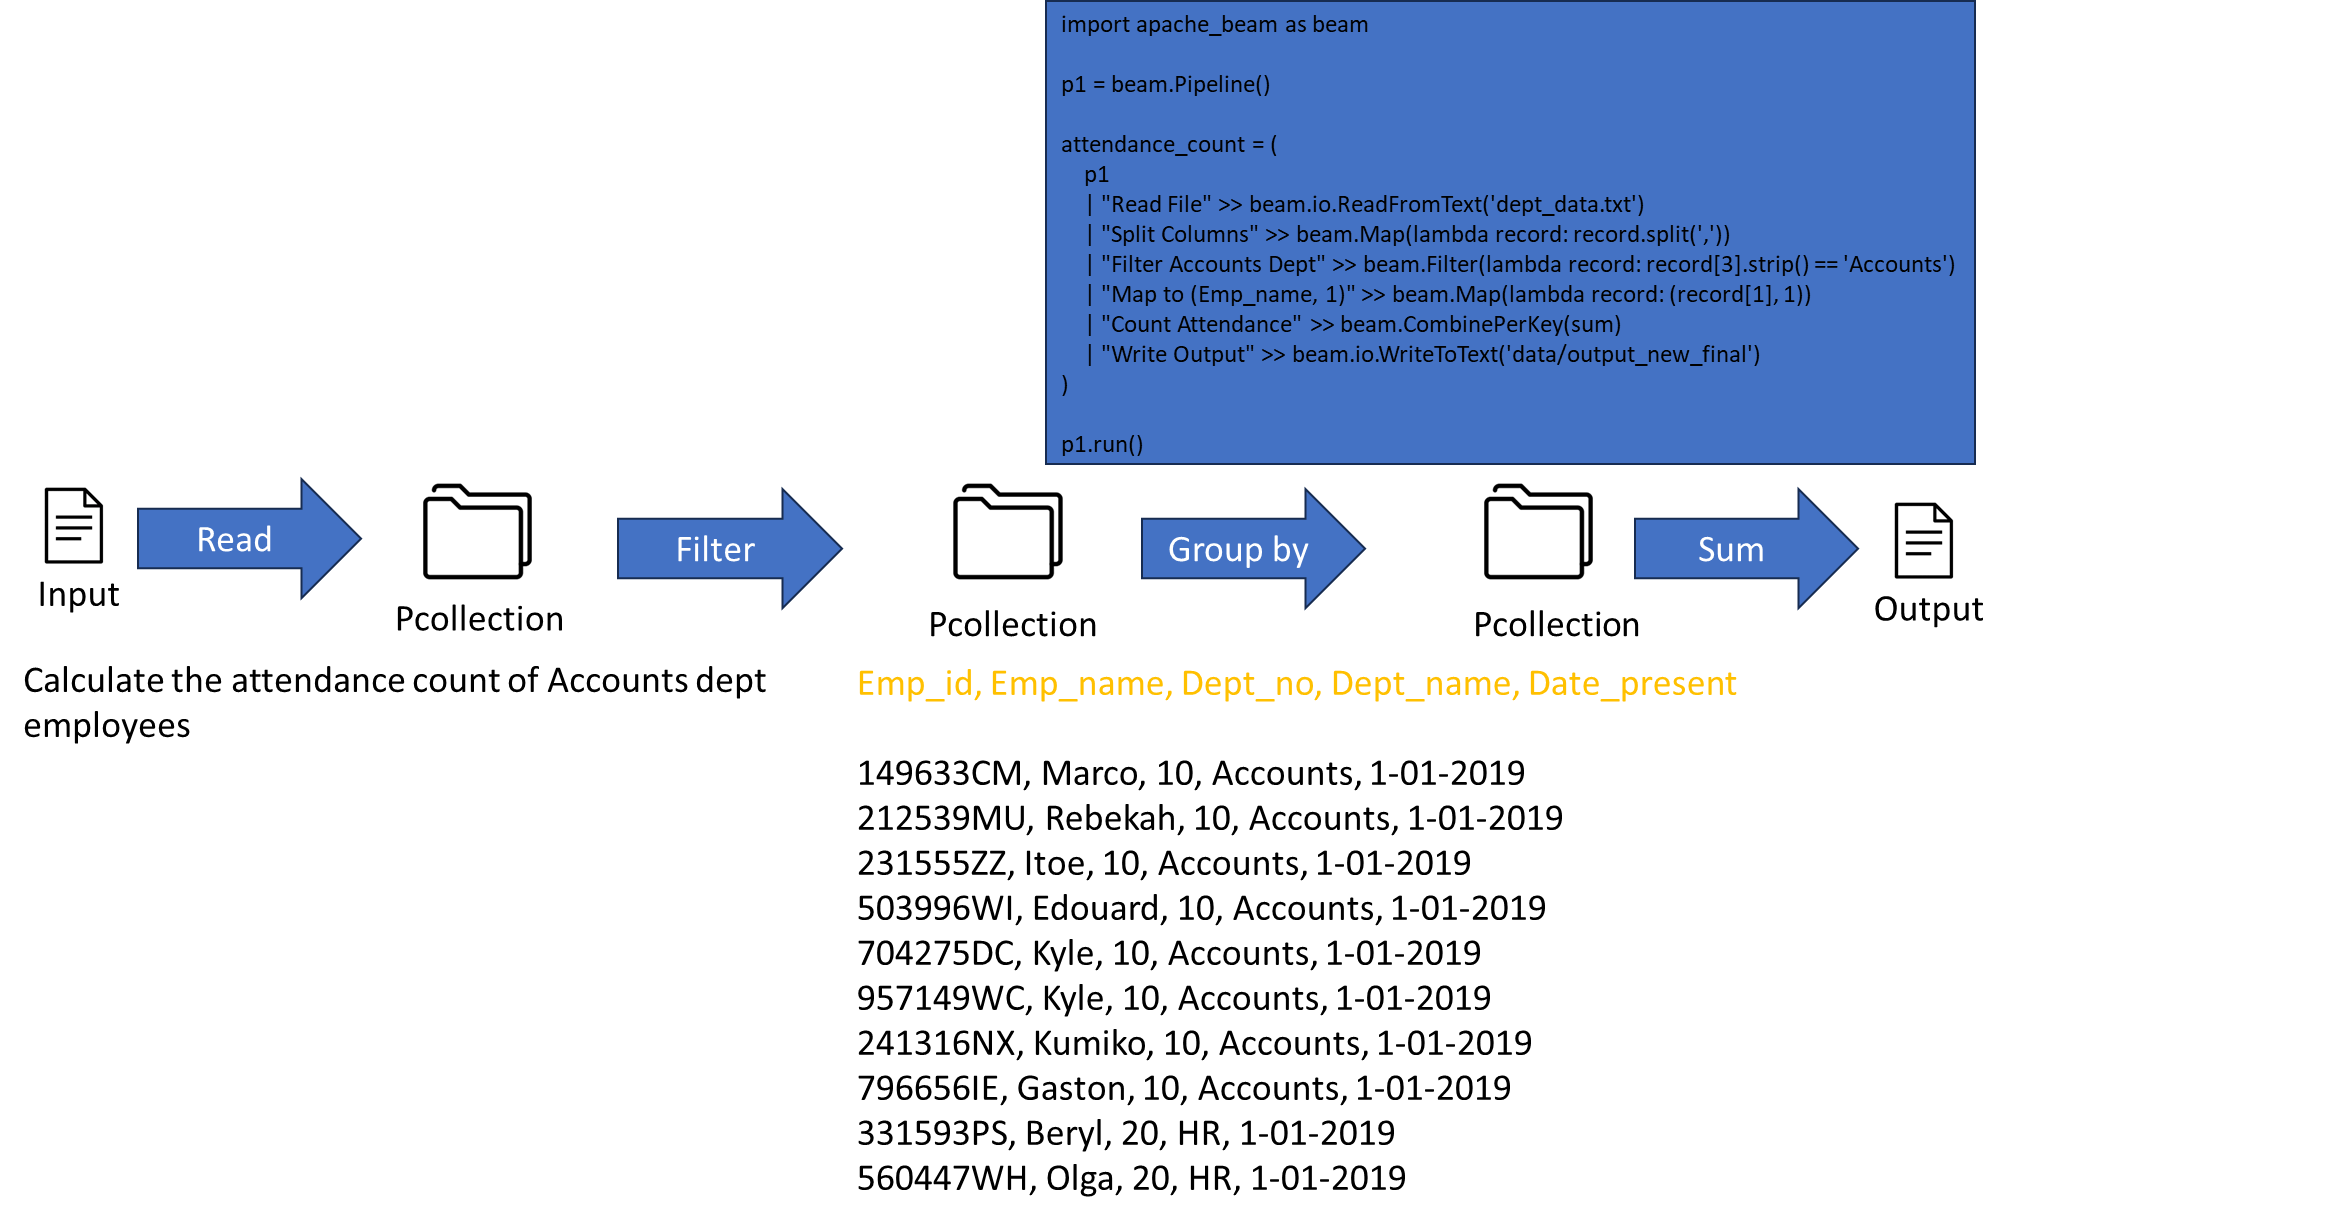

---

## 📂 Problem Statement

We have an **attendance text file** with the following columns:

1. **Emp_id** → Employee ID  
2. **Emp_name** → Employee Name  
3. **Dept_no** → Department Number  
4. **Dept_name** → Department Name  
5. **Date_present** → Dates on which employee was present  

📌 Requirement:  
👉 Count the **attendance (number of days present)** for each employee of the **Accounts Department**.

---

## ⚙️ Step-by-Step Flow

1. **Read**  
   - Use a **Read transform** to load the text file.  
   - Data gets stored into a **PCollection**.  

2. **Filter**  
   - Apply a **Filter transform** to select only employees from the **Accounts Department**.  
   - Output again stored as a **PCollection**.  

3. **Group By**  
   - Apply **GroupBy transform** to group attendance by **employee name**.  

4. **Sum**  
   - Apply **Count/Sum transform** to calculate attendance for each employee.  

5. **Output**  
   - Results can be written to:
     - Database  
     - Flat file  
     - HDFS/Cloud Storage  

---

## 📝 Code Snippet

Here’s a **partial Beam pipeline** for this use case:

```python
import apache_beam as beam

p1 = beam.Pipeline()

attendance_count = (
    p1
    | "Read File" >> beam.io.ReadFromText('dept_data.txt')
    | "Split Columns" >> beam.Map(lambda record: record.split(','))
    | "Filter Accounts Dept" >> beam.Filter(lambda record: record[3].strip() == 'Accounts')
    | "Map to (Emp_name, 1)" >> beam.Map(lambda record: (record[1], 1))
    | "Count Attendance" >> beam.CombinePerKey(sum)
    | "Write Output" >> beam.io.WriteToText('data/output_new_final')
)

p1.run()
